In [1]:
%matplotlib inline
from __future__ import division
from pandas import Series, DataFrame
import pandas as pd
from numpy.random import randn
import numpy as np
# pd.options.display.max_rows = 12
np.set_printoptions(precision=4, suppress=True)
import matplotlib.pyplot as plt
plt.rc('figure', figsize=(12, 4))
pd.set_option('display.max_columns', None) #输出所有列

def set_ch():
    from pylab import mpl
    #中文字体问题已经解决，记录在evernote中
    #mpl.rcParams['font.sans-serif'] = ['SimHei'] # 指定默认字体
    mpl.rcParams['axes.unicode_minus'] = False # 解决保存图像是负号'-'显示为方块的问题
set_ch()
from datetime import datetime,timedelta
import matplotlib
matplotlib.style.use('ggplot')
import sys
import json

In [2]:
# finding the the columns including NAN
def findingNAN(df):
    colNaN = [col for col in df.columns.values if df[col].isnull().any()==True]
    return colNaN

In [3]:
# filling the NAN upon the suggestion of sara
def filling(df, col_li):
    df['pub_avg'] = df.pub_avg.fillna(df.pub_avg.mean(skipna=True))
    col_li.remove('pub_avg')
    for col in col_li:
        df[col] = df[col].fillna(0)
    return df

In [4]:
# findingNAN——>filling——>standardization
from sklearn import preprocessing
def processing(df):
    col_toBeFill = findingNAN(df)
    filled = filling(df, col_toBeFill)
    
    X = filled.ix[:,6:-3].values
    scaler = preprocessing.StandardScaler().fit(X)
    X_sd = scaler.transform(X)
    return X_sd

In [5]:
def PCA(X,criterion):
    # calculate the eigen_vals & eigen_vecs
    cov_mat = np.cov(X.T)
    eigen_vals, eigen_vecs = np.linalg.eig(cov_mat)
    total = sum(eigen_vals)
    
    # calculate the cum_var_exp
    var_exp = [(i / total) for i in sorted(eigen_vals, reverse=True)]
    cum_var_exp = np.cumsum(var_exp)
    
    # select the number of the principle component with criterion
    for i in range(len(cum_var_exp)):
        if cum_var_exp[i] > criterion:
            n_compon = i
            break
    compon_weight_matrix = eigen_vecs[:,0:n_compon]       
            
    # compute the components    
    components = pd.DataFrame(X.dot(compon_weight_matrix))    
    
    return (n_compon, criterion, cum_var_exp, var_exp, compon_weight_matrix, components)

In [6]:
# screePlot
import seaborn as sns
def screePlot(var_exp, cum_var_exp):
    sns.set_style("whitegrid")
    plt.rc('figure', figsize=(13, 5))
    plt.bar(range(1,len(var_exp)+1), var_exp, alpha=0.5, align='center', label='individual explained variance')
    plt.step(range(1,len(var_exp)+1), cum_var_exp, where='mid',label='cumulative explained variance')
    plt.ylabel('Explained variance ratio')
    plt.xlabel('Principal components')
    plt.legend(loc='best')
    plt.show()

In [7]:
# choose a reasonable cluster by elbow graph
def plotElbowGraph(df):
    distortions = []
    for i in range(2, 10):
        km = KMeans(n_clusters=i,
                init='k-means++',
                n_init=10,
                max_iter=300,
                random_state=0)
        km.fit(df.values)
        distortions.append(km.inertia_)
    
    
    plt.plot(range(2,10), distortions, marker='o')
    plt.xlabel('Number of clusters')
    plt.ylabel('Distortion')
    plt.show()

In [8]:
# implement kmeans++ with the chosen cluster
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
def kmeans(df, num_cluster):
    # kmeans++
    km = KMeans(n_clusters=3,
                init='k-means++',
                n_init=10,
                max_iter=300,
                random_state=0)
    km.fit(df.values)
    SSE = km.inertia_
    
    # centroids
    r1 = pd.Series(km.labels_).value_counts() 
    r2 = pd.DataFrame(km.cluster_centers_) 
    df_centroids = pd.concat([r2, r1], axis=1) 
    df_centroids.columns = list(df.columns.values) + ['cluster']
    
    # new df
    df['cluster_label'] = km.labels_
    print 'SSE is %s' % SSE
    
    return (df, df_centroids)

----

In [9]:
# import data
df_up = pd.read_csv('data/index_up.csv')
df_middle = pd.read_csv('data/index_mid.csv')
df_down = pd.read_csv('data/index_down.csv')

# down

In [10]:
X = processing(df_down)
n_compon, criterion, cum_var_exp, var_exp, compon_weight_matrix, components = PCA(X, 0.75)
print 'There are %s components with the criterion %s' % (n_compon, criterion)
print 'The cumulative explained variance is %s' % cum_var_exp

/Applications/anaconda/envs/py27/lib/python2.7/site-packages/ipykernel/__main__.py:7: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate_ix


There are 19 components with the criterion 0.75
The cumulative explained variance is [ 0.2437+0.j  0.2924+0.j  0.3363+0.j  0.3769+0.j  0.4155+0.j  0.4522+0.j
  0.4850+0.j  0.5135+0.j  0.5414+0.j  0.5685+0.j  0.5922+0.j  0.6148+0.j
  0.6367+0.j  0.6575+0.j  0.6779+0.j  0.6974+0.j  0.7158+0.j  0.7330+0.j
  0.7492+0.j  0.7651+0.j  0.7802+0.j  0.7949+0.j  0.8092+0.j  0.8225+0.j
  0.8344+0.j  0.8462+0.j  0.8570+0.j  0.8677+0.j  0.8778+0.j  0.8873+0.j
  0.8962+0.j  0.9047+0.j  0.9126+0.j  0.9202+0.j  0.9274+0.j  0.9342+0.j
  0.9408+0.j  0.9471+0.j  0.9530+0.j  0.9583+0.j  0.9622+0.j  0.9656+0.j
  0.9688+0.j  0.9714+0.j  0.9735+0.j  0.9754+0.j  0.9773+0.j  0.9791+0.j
  0.9807+0.j  0.9821+0.j  0.9835+0.j  0.9848+0.j  0.9861+0.j  0.9872+0.j
  0.9883+0.j  0.9893+0.j  0.9902+0.j  0.9912+0.j  0.9920+0.j  0.9929+0.j
  0.9936+0.j  0.9943+0.j  0.9949+0.j  0.9955+0.j  0.9960+0.j  0.9965+0.j
  0.9970+0.j  0.9974+0.j  0.9978+0.j  0.9982+0.j  0.9986+0.j  0.9989+0.j
  0.9992+0.j  0.9995+0.j  0.9997+0.j  0

/Applications/anaconda/envs/py27/lib/python2.7/site-packages/matplotlib/patches.py:693: ComplexWarning: Casting complex values to real discards the imaginary part
  self._height = float(height)
/Applications/anaconda/envs/py27/lib/python2.7/site-packages/numpy/core/numeric.py:531: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


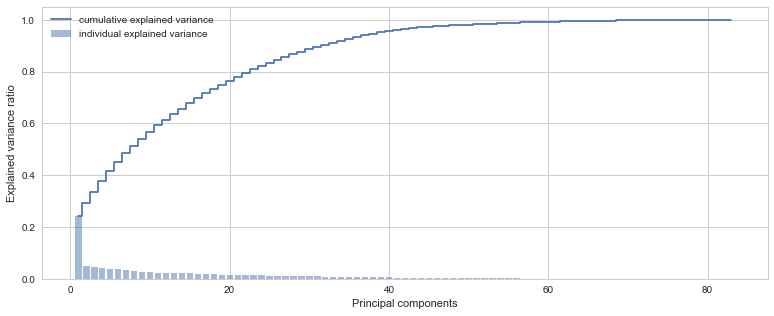

In [11]:
screePlot(var_exp, cum_var_exp)

/Applications/anaconda/envs/py27/lib/python2.7/site-packages/sklearn/utils/validation.py:433: ComplexWarning: Casting complex values to real discards the imaginary part
  array = np.array(array, dtype=dtype, order=order, copy=copy)


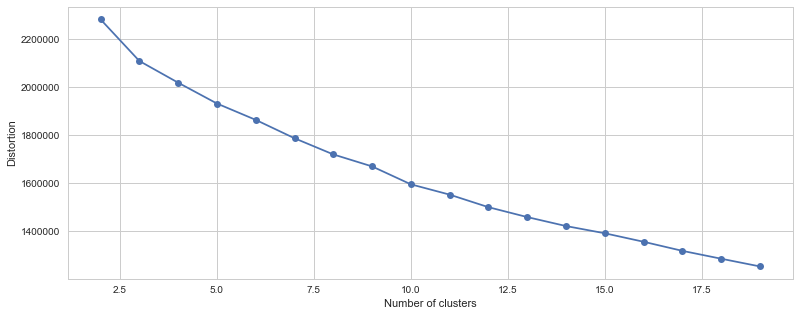

In [12]:
plotElbowGraph(components)

In [13]:
len(X)

45555

In [19]:
df_down_km, df_down_centroid = kmeans(components, 3)
df_down_km.to_csv('data/down_pca.csv')

SSE is 2108740.40376


# up

In [10]:
X = processing(df_up)
n_compon, criterion, cum_var_exp, var_exp, compon_weight_matrix, components = PCA(X, 0.75)
print 'There are %s components with the criterion %s' % (n_compon, criterion)
print 'The cumulative explained variance is %s' % cum_var_exp

/Applications/anaconda/envs/py27/lib/python2.7/site-packages/ipykernel/__main__.py:7: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate_ix


There are 20 components with the criterion 0.75
The cumulative explained variance is [ 0.1993+0.j  0.2545+0.j  0.2977+0.j  0.3407+0.j  0.3813+0.j  0.4156+0.j
  0.4486+0.j  0.4809+0.j  0.5111+0.j  0.5372+0.j  0.5631+0.j  0.5877+0.j
  0.6111+0.j  0.6338+0.j  0.6549+0.j  0.6757+0.j  0.6955+0.j  0.7150+0.j
  0.7324+0.j  0.7488+0.j  0.7651+0.j  0.7808+0.j  0.7948+0.j  0.8081+0.j
  0.8206+0.j  0.8328+0.j  0.8446+0.j  0.8557+0.j  0.8664+0.j  0.8766+0.j
  0.8864+0.j  0.8958+0.j  0.9048+0.j  0.9134+0.j  0.9214+0.j  0.9293+0.j
  0.9363+0.j  0.9426+0.j  0.9486+0.j  0.9540+0.j  0.9581+0.j  0.9616+0.j
  0.9647+0.j  0.9677+0.j  0.9705+0.j  0.9729+0.j  0.9753+0.j  0.9772+0.j
  0.9789+0.j  0.9807+0.j  0.9822+0.j  0.9837+0.j  0.9850+0.j  0.9863+0.j
  0.9875+0.j  0.9886+0.j  0.9896+0.j  0.9904+0.j  0.9913+0.j  0.9921+0.j
  0.9929+0.j  0.9936+0.j  0.9943+0.j  0.9950+0.j  0.9955+0.j  0.9960+0.j
  0.9965+0.j  0.9970+0.j  0.9974+0.j  0.9978+0.j  0.9982+0.j  0.9986+0.j
  0.9989+0.j  0.9993+0.j  0.9995+0.j  0

/Applications/anaconda/envs/py27/lib/python2.7/site-packages/matplotlib/patches.py:693: ComplexWarning: Casting complex values to real discards the imaginary part
  self._height = float(height)
/Applications/anaconda/envs/py27/lib/python2.7/site-packages/numpy/core/numeric.py:531: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


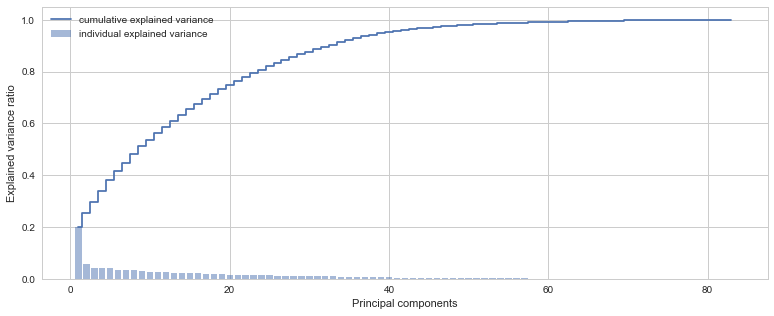

In [11]:
screePlot(var_exp, cum_var_exp)

/Applications/anaconda/envs/py27/lib/python2.7/site-packages/sklearn/utils/validation.py:433: ComplexWarning: Casting complex values to real discards the imaginary part
  array = np.array(array, dtype=dtype, order=order, copy=copy)


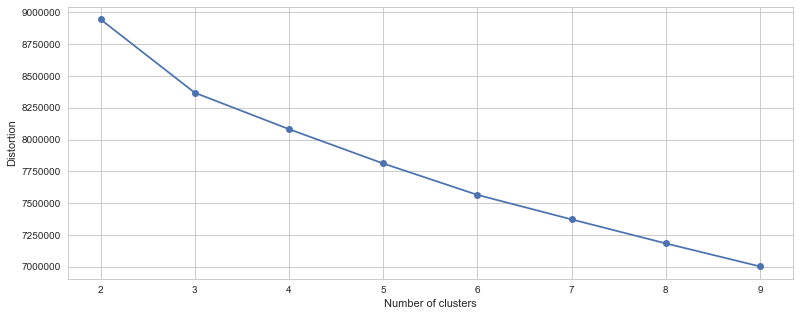

In [12]:
plotElbowGraph(components)

In [13]:
df_up_km, df_up_centroid = kmeans(components, 3)
df_up_km.to_csv('data/up_pca.csv')

/Applications/anaconda/envs/py27/lib/python2.7/site-packages/sklearn/utils/validation.py:433: ComplexWarning: Casting complex values to real discards the imaginary part
  array = np.array(array, dtype=dtype, order=order, copy=copy)


SSE is 8368017.45379


# middle

In [14]:
X = processing(df_middle)
n_compon, criterion, cum_var_exp, var_exp, compon_weight_matrix, components = PCA(X, 0.75)
print 'There are %s components with the criterion %s' % (n_compon, criterion)
print 'The cumulative explained variance is %s' % cum_var_exp

/Applications/anaconda/envs/py27/lib/python2.7/site-packages/ipykernel/__main__.py:7: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate_ix


There are 18 components with the criterion 0.75
The cumulative explained variance is [ 0.2208+0.j  0.2859+0.j  0.3336+0.j  0.3782+0.j  0.4218+0.j  0.4605+0.j
  0.4952+0.j  0.5287+0.j  0.5572+0.j  0.5830+0.j  0.6075+0.j  0.6315+0.j
  0.6543+0.j  0.6747+0.j  0.6942+0.j  0.7127+0.j  0.7290+0.j  0.7448+0.j
  0.7595+0.j  0.7738+0.j  0.7877+0.j  0.8003+0.j  0.8124+0.j  0.8239+0.j
  0.8348+0.j  0.8454+0.j  0.8553+0.j  0.8647+0.j  0.8732+0.j  0.8817+0.j
  0.8898+0.j  0.8977+0.j  0.9050+0.j  0.9120+0.j  0.9188+0.j  0.9254+0.j
  0.9319+0.j  0.9380+0.j  0.9432+0.j  0.9481+0.j  0.9525+0.j  0.9558+0.j
  0.9586+0.j  0.9615+0.j  0.9641+0.j  0.9666+0.j  0.9689+0.j  0.9712+0.j
  0.9733+0.j  0.9753+0.j  0.9772+0.j  0.9789+0.j  0.9806+0.j  0.9822+0.j
  0.9836+0.j  0.9850+0.j  0.9863+0.j  0.9876+0.j  0.9887+0.j  0.9898+0.j
  0.9908+0.j  0.9917+0.j  0.9925+0.j  0.9933+0.j  0.9941+0.j  0.9948+0.j
  0.9954+0.j  0.9961+0.j  0.9967+0.j  0.9972+0.j  0.9978+0.j  0.9983+0.j
  0.9988+0.j  0.9992+0.j  0.9996+0.j  0

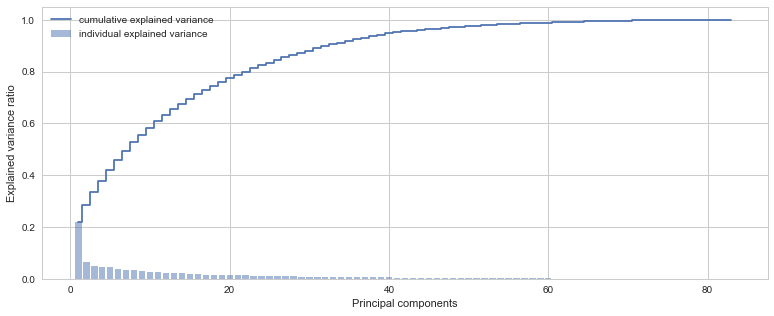

In [15]:
screePlot(var_exp, cum_var_exp)

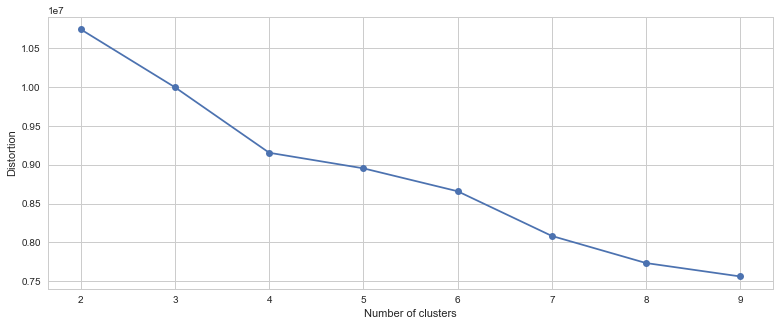

In [16]:
plotElbowGraph(components)

In [17]:
df_middle_km, df_middle_centroid = kmeans(components, 3)
df_middle_km.to_csv('data/middle_pca.csv')

SSE is 9997934.85388


---------------